In [41]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
a = np.arange(0,10)

print(a)

select = np.ones(10, dtype=bool)
select[0]*=0
select[5]*=0

print(select)

a = a[select]
print(a)

[0 1 2 3 4 5 6 7 8 9]
[False  True  True  True  True False  True  True  True  True]
[1 2 3 4 6 7 8 9]


In [8]:
header = []
a = 'a'
b = ['1','2']
header.append(a)
header.append(b)

print(header)

TypeError: append() takes exactly one argument (2 given)

In [5]:
import h5py

hdf5_file = h5py.File('/home/oliverkn/pro/real_data_test/test.hdf5', "r")

data = hdf5_file['data'].value
print(data)

[[ 86.43134308   2.           0.         ...   6.4962697    9.88655853
    9.6108036 ]
 [ 44.59764481   1.           0.         ...  14.81808567 -31.0936203
   68.89452362]
 [114.64307404   2.           0.         ...  24.90043449  -6.58133125
   56.367939  ]
 ...
 [157.49171448   4.           0.         ...  26.91314697  -6.02441216
   51.97216415]
 [144.65318298   2.           0.         ...  20.26492119  22.86613655
   25.05741119]
 [132.97286987   3.           0.         ...   0.19480547  -8.82190704
   30.38890457]]


/home/oliverkn/pro/pycharm/venv/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [8]:
s = ['a', 'babsd', '324rewf']
s = np.array(s, dtype=str)

print(s)

hdf5_file = h5py.File('test.hd5f', "w")
hdf5_file.create_dataset('header', data=s)
hdf5_file.close()


['a' 'babsd' '324rewf']


TypeError: No conversion path for dtype: dtype('<U7')

In [14]:
from ntuplizer_mod.lorentz_vector import LorentzVector

l1 = LorentzVector()
l1.setptetaphim(1,1,1,0)
print(l1)

l2 = LorentzVector()
l2.setptetaphim(1,1,1,np.pi)

l = l1+l2

print(l.mass)

(0.5403023058681398, 0.8414709848078965, 1.1752011936438014, 1.5430806348152437)
3.9886442252847685


In [8]:
import scipy.stats as stats
1 - 2*stats.norm.sf(5)


0.9999994266968563

In [36]:
from sklearn.preprocessing import OneHotEncoder
data = [[-1, 0],
        [2, 2],
        [1, 1]]
data = np.array(data)

data[:,0] = np.clip(data[:,0], a_min= -1, a_max = 1)

print(data)

mask = [True, True]
categories = [None]*2
categories[0] = [-1,1]
categories[1] = [0,1,2]

enc = OneHotEncoder(categories=categories)
enc.fit(data)

data_t = enc.transform(data).toarray()
print(data_t.shape)
print(data_t)

# data_t = [[1,0,0],
#         [0,0,1],
#         [34,1,6.9]]
# data_t=np.array(data_t)

data_i = enc.inverse_transform(data_t)
print(data_i)

# split disc part




[[-1  0]
 [ 1  2]
 [ 1  1]]
(3, 5)
[[1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0.]]
[[-1  0]
 [ 1  2]
 [ 1  1]]


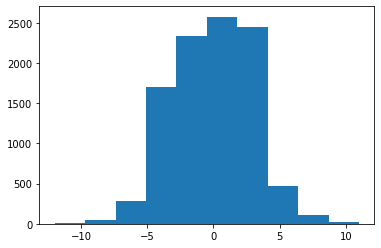

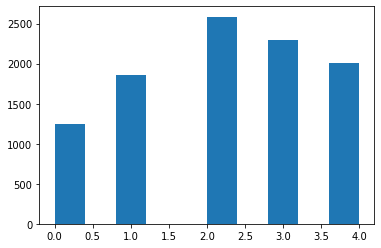

(array([1252.,    0.,    0., 1856.,    0., 2586., 2301.,    0.,    0.,
        2005.]),
 array([-7.5 , -6.05, -4.6 , -3.15, -1.7 , -0.25,  1.2 ,  2.65,  4.1 ,
         5.55,  7.  ]),
 <a list of 10 Patch objects>)

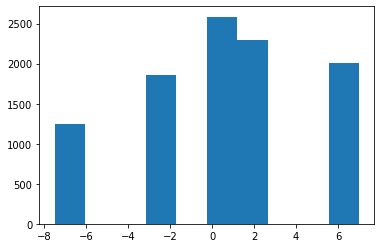

In [55]:
from sklearn.preprocessing import KBinsDiscretizer
data = np.random.normal(size=10000, loc=0, scale=3)
data = np.round(data).reshape((-1,1))
plt.hist(data)

dis = KBinsDiscretizer(n_bins=5,encode='ordinal', strategy='quantile')
dis.fit(data)
plt.show()

data_t = dis.transform(data)
plt.hist(data_t)
plt.show()

data_i = dis.inverse_transform(data_t)
plt.hist(data_i)
